## The goal of this XP:

- Build the anatomical and the functional montage images without layout 

- Generate a binary mask combining outline functional mask and the subject's bold mask 

- in the functional iamges, replace the mask by pixels from the anatomical image


In [1]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.



In [2]:
% Set parameters
niak_gb_vars
path_root = '/home/yassinebha/Drive/QC_zooniverse/';
#path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/';
subject = 'HC0040013'

subject = HC0040013


# Make anatomical and Functional montage images 

### ANAT

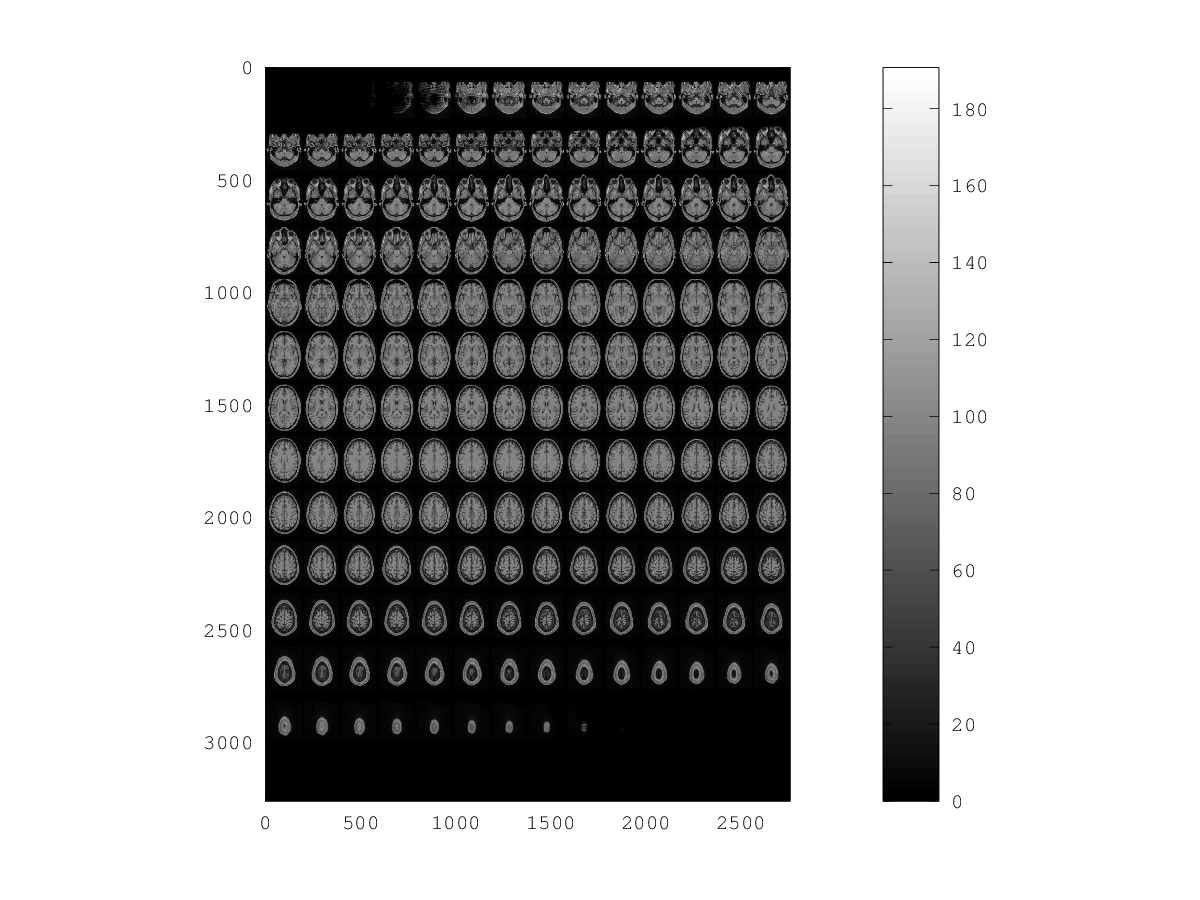

In [3]:
# anat subject vol 
niak_gb_vars
[hdr,vol] = niak_read_vol([path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.nii.gz']);
[hdr,mask] = niak_read_vol([ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_asym_09a_headmask.mnc.gz']);
opt.type_color = 'gray';
niak_montage(vol,opt)

    imformats>default_formats at line 256 column 11
    imformats at line 79 column 3
    imwrite at line 99 column 7
    niak_brick_vol2img at line 143 column 5


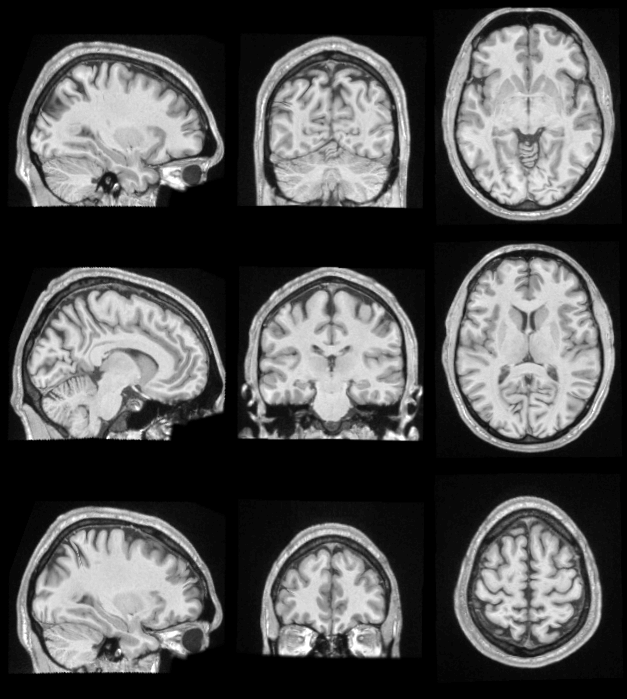

In [4]:
% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = false;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

## FUNC

In [5]:
# Alpply non uniformity corretion first
clear  files_in files_out opt
files_in.vol = [path_root 'template_layout/test_data/' subject '/func_' subject '_mean_stereonl.nii.gz'];
files_in.mask = [path_root 'template_layout/test_data/' subject '/func_mask_group_stereonl.nii.gz'];
files_out.vol_nu = '';
files_out.vol_imp = '';
opt.folder_out =  [path_root 'template_layout/test_data/' subject '/'];
[files_in,files_out,opt] = niak_brick_nu_correct(files_in,files_out,opt);


*****************************************
Non-uniformity correction on an MR volume
*****************************************
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl.nii.gz to /tmp/niak_tmp_817904923_func_HC0040013_mean_stereonl/vol.mnc
Copying or converting file /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_mask_group_stereonl.nii.gz to /tmp/niak_tmp_817904923_func_HC0040013_mean_stereonl/mask.mnc
Running NU_CORRECT with the following command:
nu_correct -clobber -tmpdir /tmp/niak_tmp_817904923_func_HC0040013_mean_stereonl/ -distance 200 -mask /tmp/niak_tmp_817904923_func_HC0040013_mean_stereonl/mask.mnc /tmp/niak_tmp_817904923_func_HC0040013_mean_stereonl/vol.mnc /tmp/niak_tmp_817904923_func_HC0040013_mean_stereonl/vol_nu.mnc

Transforming slices:..............Done
Processing:..............Done
Processing:..............Done
Processing:..............Done
Processing

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


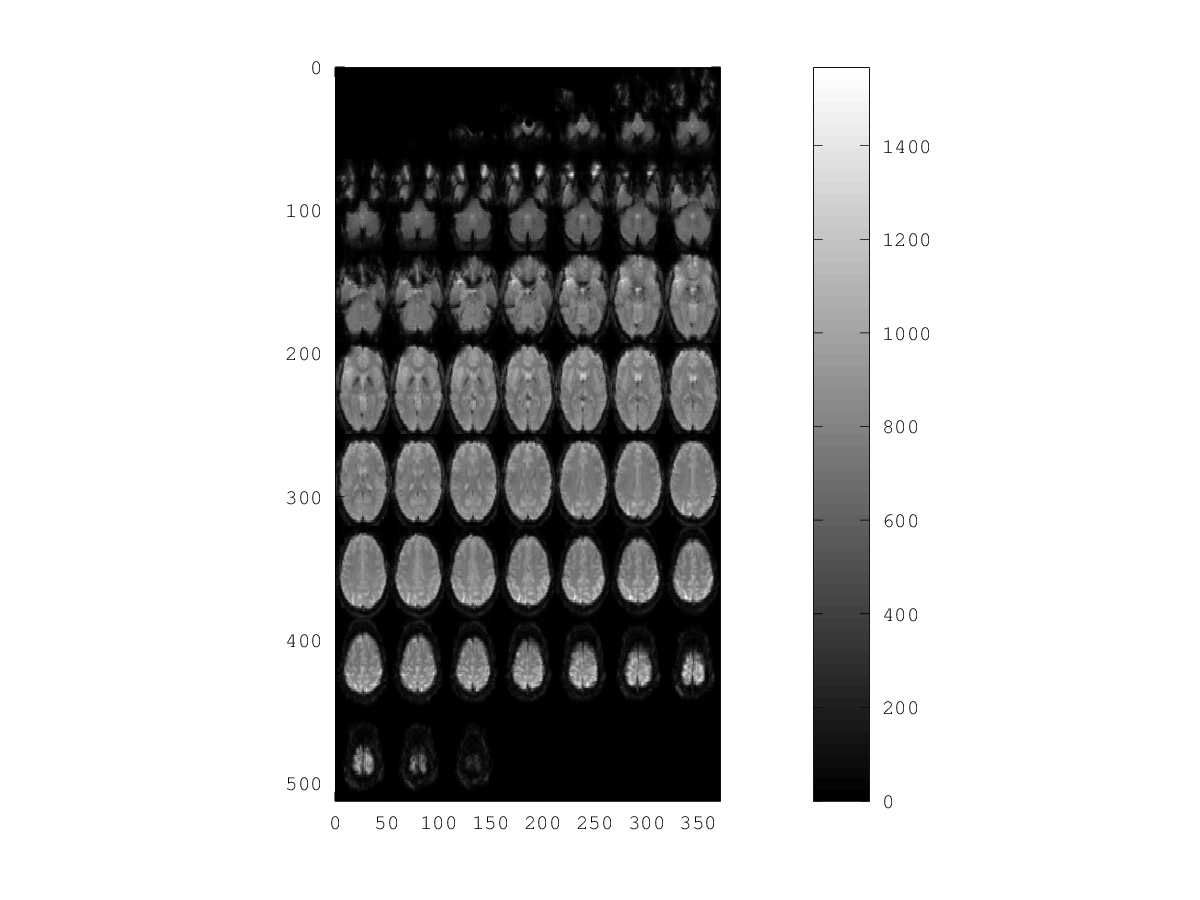

In [6]:
# Dispaly before correction image
[hdr,vol] = niak_read_vol(files_out.vol_nu);
[hdr,vol_raw] = niak_read_vol(files_in.vol);
opt.type_color = 'gray';
niak_montage(vol_raw,opt)

    niak_set_defaults at line 102 column 31
    niak_montage at line 110 column 1


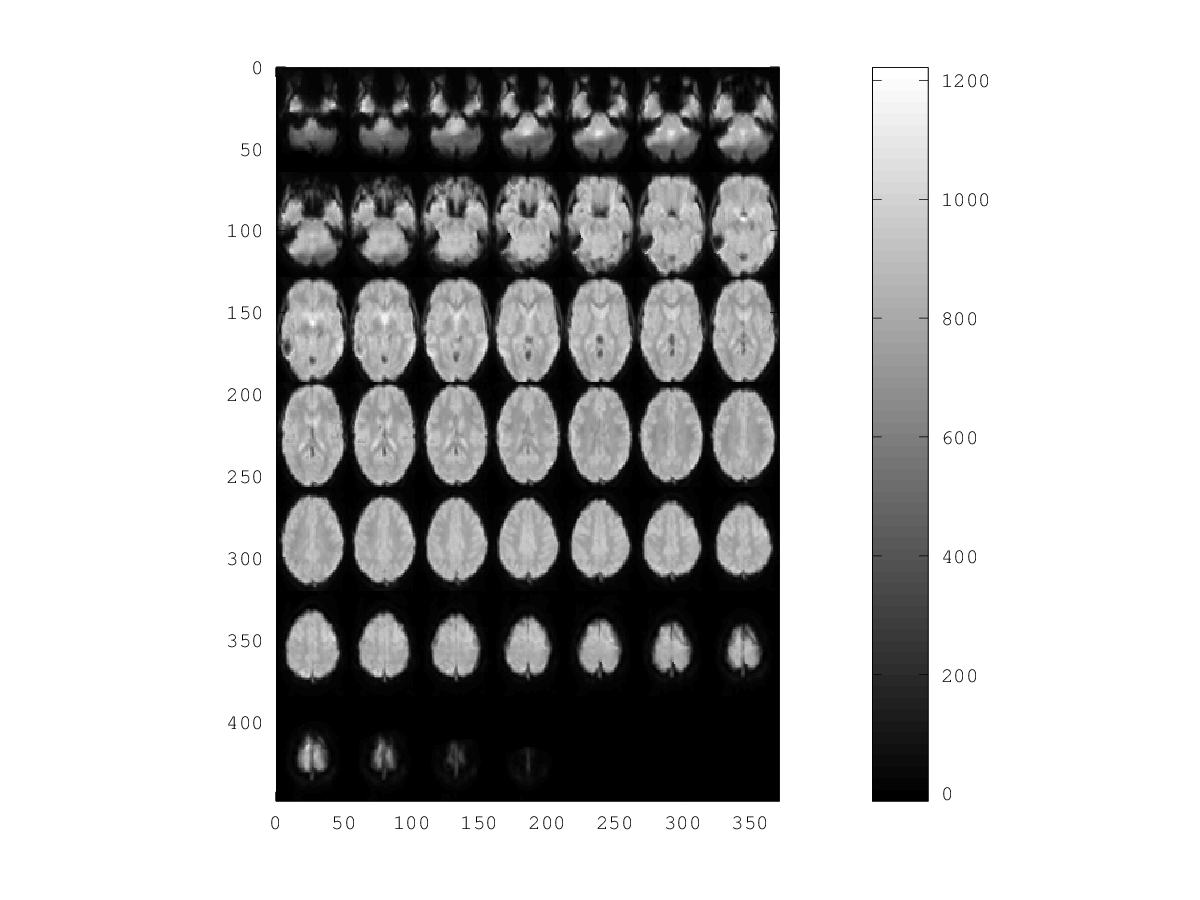

In [7]:
# After correction
niak_montage(vol,opt)

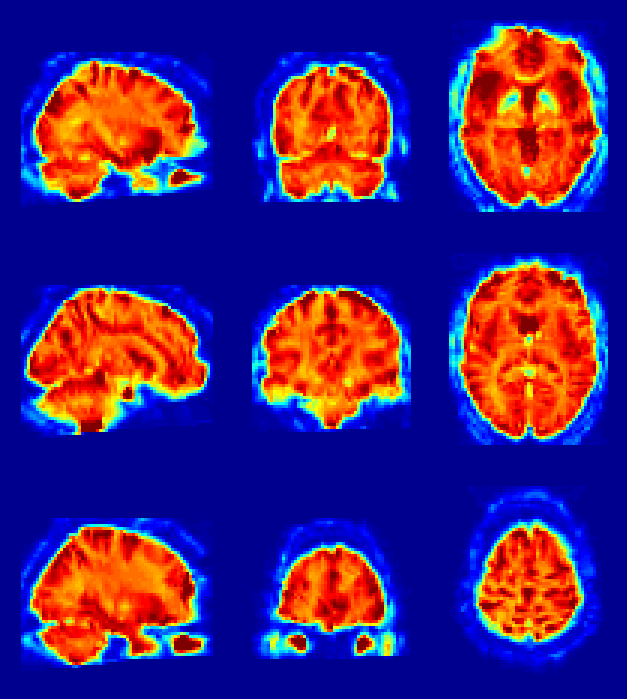

In [8]:
%% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/' subject '/func_' subject '_mean_stereonl_nu.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/' subject '/func_' subject '_mean_stereonl_nu.png'];

% Options
jopt.colormap = 'jet';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = false;
jopt.coord =[-30 , -65 , -6 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);
imshow(jout)

## Add outlines

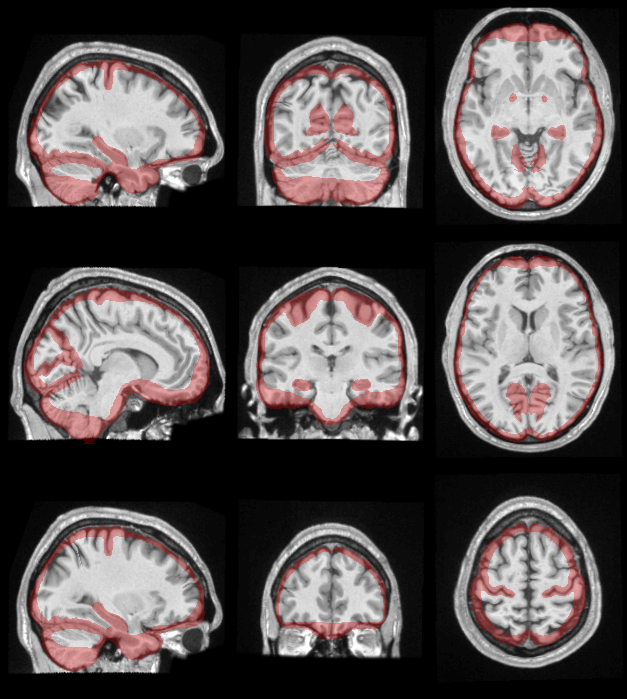

In [35]:
%% Add overlay functional-layout to anat subject 
clear jin jout jopt
param.transparency = 0.7;
jin.background =  [path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/' subject '/anat_' subject '_nuc_stereonl_func_outline.png'];
jopt.transparency = param.transparency;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);
imshow(jout)

## generate gif animation

In [11]:
# generate gif
PATH = ['/home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/' subject filesep];
command = ['convert '  PATH  'func_' subject '_mean_stereonl_nu.png '  PATH ...
'anat_' subject '_nuc_stereonl_func_outline.png '   PATH  'func_' subject '_mean_stereonl_nu.png  -delay 1 -morph 4 ' ...
PATH  'morph_' subject '_oladway_xp.gif']

command = convert /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_nu.png /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/anat_HC0040013_nuc_stereonl_func_outline.png /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/func_HC0040013_mean_stereonl_nu.png  -delay 1 -morph 4 /home/yassinebha/Drive/QC_zooniverse/template_layout/test_data/HC0040013/morph_HC0040013_oladway_xp.gif


In [12]:
system(command)

ans = 0


## XP result